# Zadanie domowe

W przypadku obrazów w odcieniach szarości pojedynczy piksel z zakresu [0; 255] reprezentowany jest jako 8-bitowa liczba bez znaku.
Pewnym rozszerzeniem analizy sposobu reprezentacji obrazu może być następujący eksperyment.
Załóżmy, że z każdego z 8 bitów możemy stworzyć pojedynczy obraz binarny (ang. _bit-plane slicing_).
Dla obrazka _100zloty.jpg_ (https://raw.githubusercontent.com/vision-agh/poc_sw/master/02_Point/100zloty.jpg) stwórz 8 obrazów, z których każdy powinien zawierać jedną płaszczyznę bitową.
Podpowiedź $-$ warto sprawdzić, jak realizuje się bitowe operacje logiczne.
Zastosowanie takiej dekompozycji obrazu pozwala na analizę ,,ważności'' poszczególnych bitów.
Jest to użyteczne w kwantyzacji, ale także w kompresji.

W drugim etapie zadania proszę spróbować odtworzyć obraz oryginalny z mniejszej liczby obrazów binarnych.
Warto zacząć od dwóch najbardziej znaczących bitów, a później dodawać kolejne.
Należy utworzyć co najmniej trzy wersje zrekonstruowanych obrazów.
Podpowiedź $-$ rekonstrukcja obrazu to mnożenie przez odpowiednią potęgę liczby 2 (przesunięcie bitowe) oraz dodawanie.

In [1]:
import cv2
import os
import requests
import matplotlib.pyplot as plt

url = 'https://raw.githubusercontent.com/vision-agh/poc_sw/master/02_Point/'
fileName = '100zloty.jpg'
if not os.path.exists(fileName) :
    r = requests.get(url + fileName, allow_redirects=True)
    open(fileName, 'wb').write(r.content)

In [2]:
image = cv2.imread('100zloty.jpg')

In [3]:
bit_planes = [((image >> i) & 1) * 255 for i in range(8)]

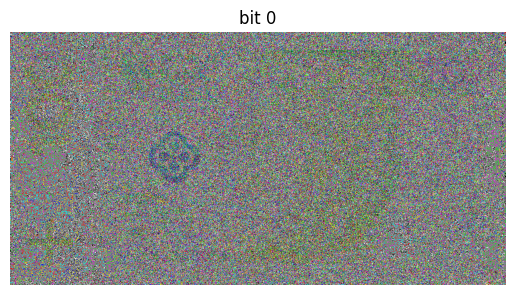

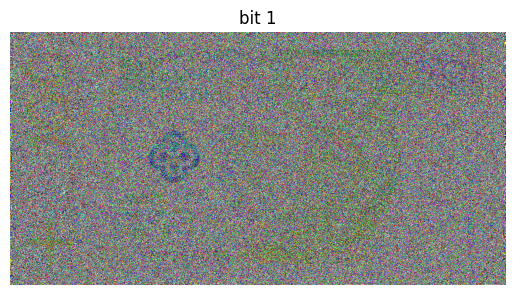

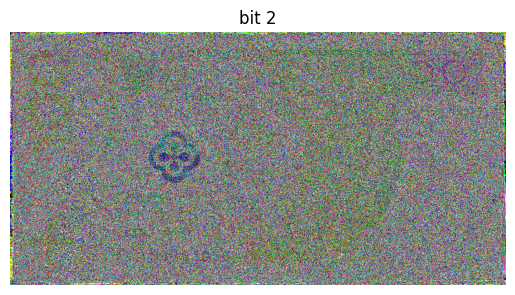

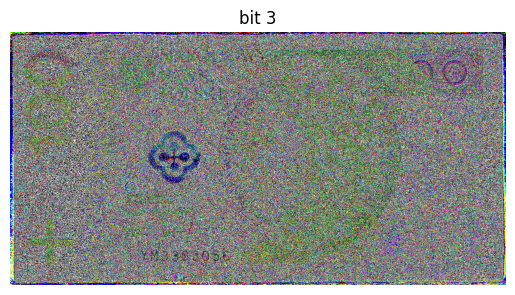

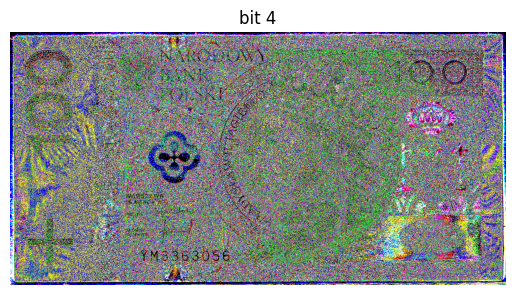

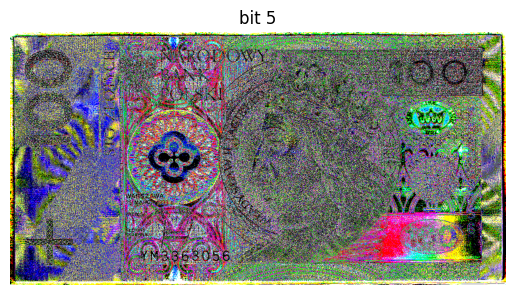

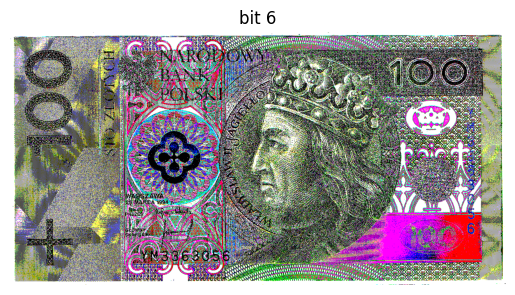

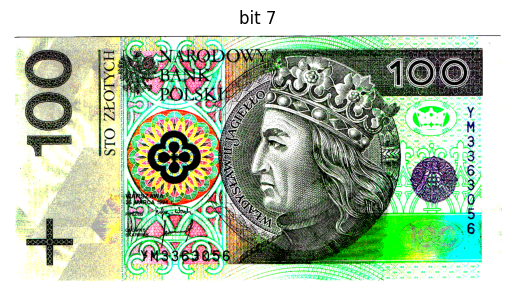

<Figure size 640x480 with 0 Axes>

In [9]:
for i, x in enumerate(bit_planes):
    plt.imshow(x)
    plt.axis('off')
    plt.title(f'bit {i}')
    plt.figure()

In [5]:
rec1 = (bit_planes[7].astype('bool') << 7) + (bit_planes[6].astype('bool') << 6)
rec2 = rec1 +(bit_planes[5].astype('bool') << 5) + (bit_planes[4].astype('bool') << 4)
rec3 = rec2 +(bit_planes[3].astype('bool') << 3) + (bit_planes[2].astype('bool') << 2)
rec4 = rec3 +(bit_planes[1].astype('bool') << 1) + bit_planes[0].astype('bool')

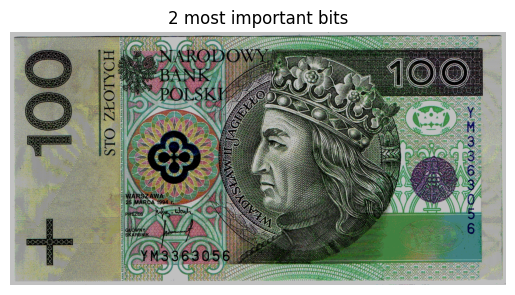

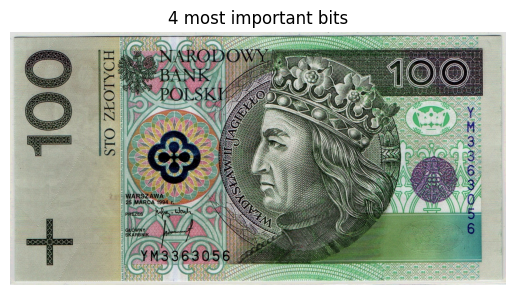

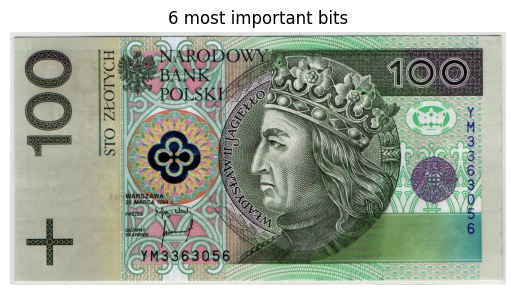

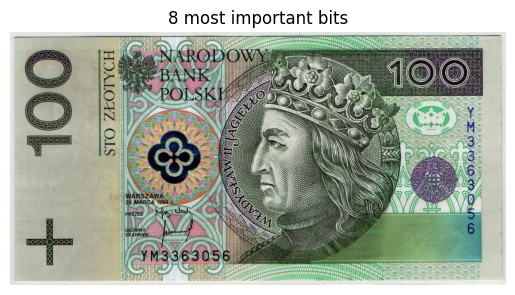

<Figure size 640x480 with 0 Axes>

In [6]:
for i, x in enumerate([rec1, rec2, rec3, rec4]):
    plt.imshow(x)
    plt.axis('off')
    plt.title(f'{i*2 + 2} most important bits')
    plt.figure()

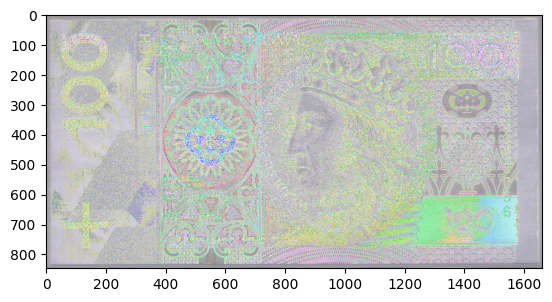

In [42]:
rec5 = sum((bit_planes[i] << i) for i in range(7)).astype('uint8')
rec5 = (rec5 - rec5.min()) / (rec5.max() - rec5.min()) * 255
rec5 = rec5.astype('uint8')
plt.imshow(rec5)

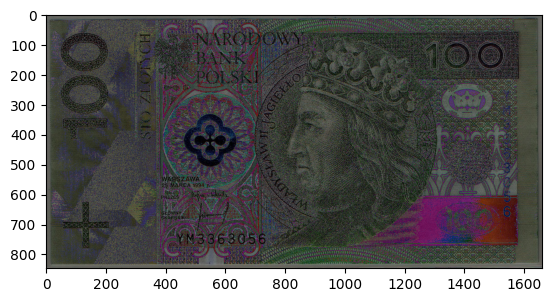

In [32]:
plt.imshow(rec5)